## Class Importation & Summary

In [ ]:
import sys

print(sys.version)
print(sys.executable)
# !pip freeze

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
/usr/bin/python3


In [ ]:
!pip install distinctipy -q
!pip install usearch -q

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import DBSCAN
from scipy.spatial import Delaunay
import random
import itertools
from itertools import chain
from scipy.stats import gaussian_kde
from scipy.spatial.distance import pdist
import math
import warnings
from sklearn.neighbors import KNeighborsClassifier
import distinctipy
import folium
from folium.plugins import FloatImage
import matplotlib.colors as colors
import matplotlib.cm as cm

from dtc_revised import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.7/680.7 kB 20.1 MB/s eta 0:00:00


Check the triangulation_dbscan class structure

### Input Parameters:

**data**: dataframe
- The input dataframe with column names 'x' and 'y' representing the coordinates of the spatial data

**minPts**: int > 1, default=5
- The number of samples in a neighborhood for a point to be considered as a core point. This does not include the point itself.

**kde**: bool, defult=False
- Create initial clusters based on the kernel density estimation of the data before using triangulation-based DBSCAN. It aims at solving the various density problem in complex data.
- If the density of the data is uniformly distributed, this option can be set to False to improve efficiency.

**min_sample**: int > 1, defult = 12
- The number of points in the smallest cluster

**local_std**: float, default = 2.5
- The standard deviation used as threshold to locally remove outlying triangles.

**figsize**: (float, float), default = (8,8)
- Width, height in inches of the final output.

**progress**: bool, defult = False
- Allow the displayment of the detailed algorithm progress.



## Data Experiments

### Synthetic Data

###### Complex Domain

Start creating initial clusters based on Kernel Density estimation:
[131, 133, 72, 62, 155, 85, 33, 127, 66, 177, 80, 0, 27, 183, 51, 158, 91, 169, 84, 118, 193, 61, 104, 49, 126, 113, 136, 31, 101, 40, 148, 175, 192, 108, 18, 144, 153, 46, 73, 21, 106, 199, 135, 7, 172, 176, 52, 60, 75, 70, 195, 9, 1, 146, 23, 151, 196, 128, 184, 145, 94, 159, 39, 189, 29, 13, 174, 36, 89, 180, 8, 107, 34, 134, 87, 198, 86, 19, 123, 114, 54, 53, 35, 116, 15, 74, 48, 93, 186, 197, 129, 103, 109, 20, 102, 16, 137, 187, 12, 100, 4, 120, 165, 141, 132, 164, 28, 41, 10, 179, 55, 82, 50, 119, 37, 88, 191, 42, 65, 121, 124, 130, 117, 168, 14, 112, 181]
[47, 56, 28, 63, 54, 53, 48, 41, 71, 50, 29, 10, 23, 37, 58, 21, 27, 45, 7, 65, 49, 20, 5, 24, 40, 57, 61, 51, 64, 36, 4, 12, 46, 16, 3, 17, 32, 59, 8, 67, 25, 6, 62, 0, 34, 2, 66]
[8, 25, 13, 12, 16, 18, 17, 4, 1, 10, 15, 22, 24, 11, 9, 23, 2, 3, 19, 14, 7, 5, 21, 0]
Start clustering within each initial cluster based on Triangulation


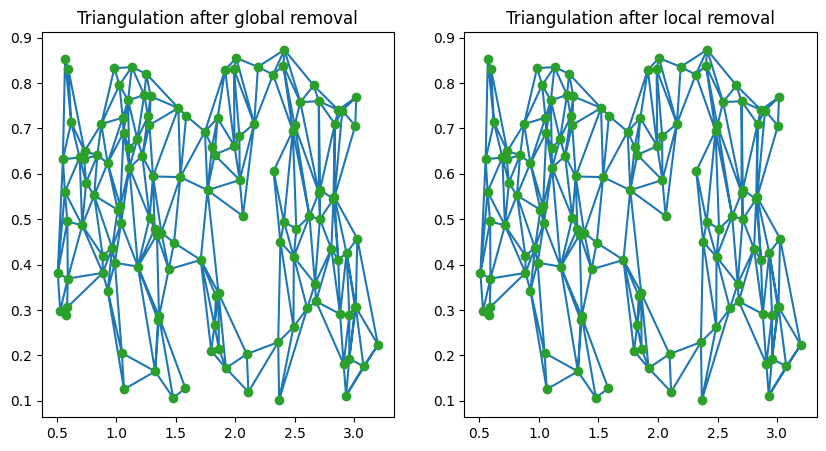

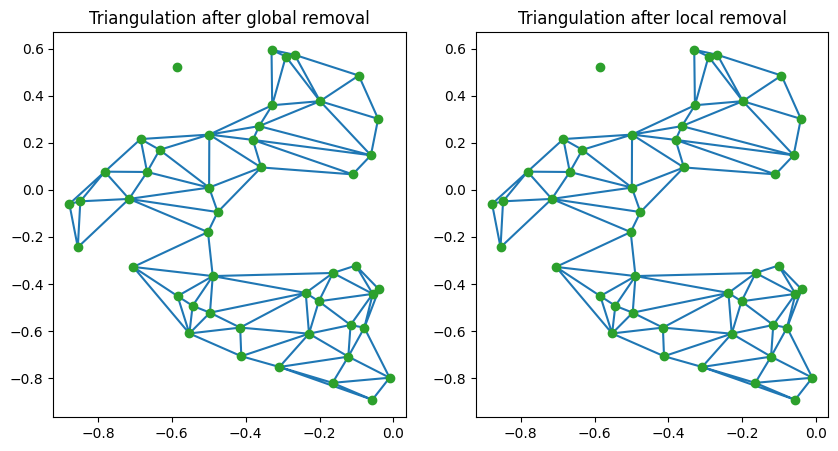

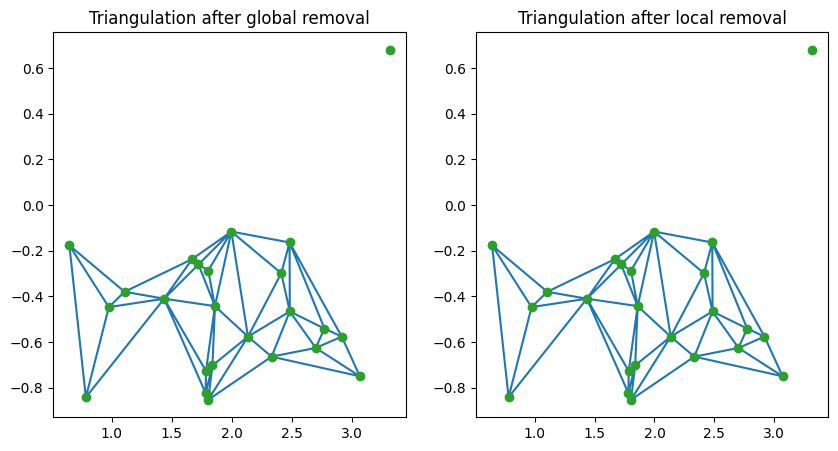

clus_num: [1 3 2 4]


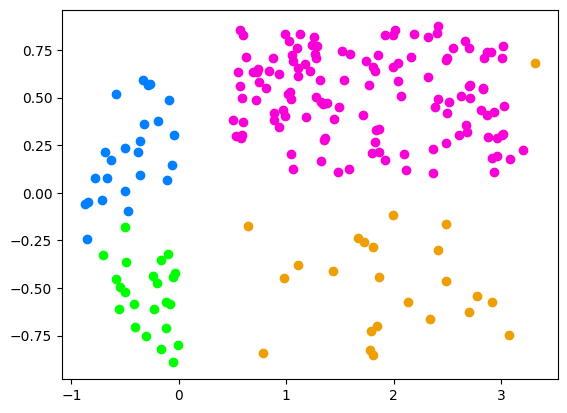

In [ ]:
Z = pd.read_csv('Z1.csv')
density = pd.read_csv('f1.init.csv')
df = pd.DataFrame({'x': Z['x.coord'][:, ], 'y': Z['y.coord'][:,]})
alg = triangulation_dbscan(df, local_std= 2.5,figsize = (4,4),kde=True, progress=True)
clusters_df = alg.tri_dbscan()

#### sklearn Banchmarks

In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

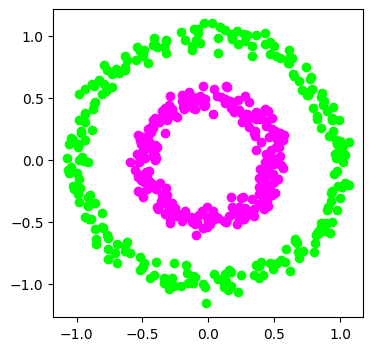

In [ ]:
df_noisy_circles = pd.DataFrame({'x': noisy_circles[0][:, 0], 'y': noisy_circles[0][:, 1]})
alg = triangulation_dbscan(df_noisy_circles, local_std=2.5, figsize = (4,4))
clusters_df = alg.tri_dbscan()

In [ ]:
df_noisy_moons = pd.DataFrame({'x': noisy_moons[0][:, 0], 'y': noisy_moons[0][:, 1]})
alg = triangulation_dbscan(df_noisy_moons, local_std=2.5, figsize = (4,4))
clusters_df = alg.tri_dbscan()

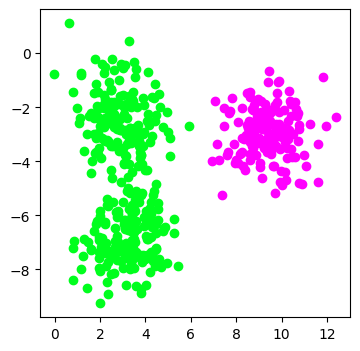

In [ ]:
df_blobs = pd.DataFrame({'x': blobs[0][:, 0], 'y': blobs[0][:, 1]})
alg = triangulation_dbscan(df_blobs, local_std=2.5, figsize = (4,4))
clusters_df = alg.tri_dbscan()

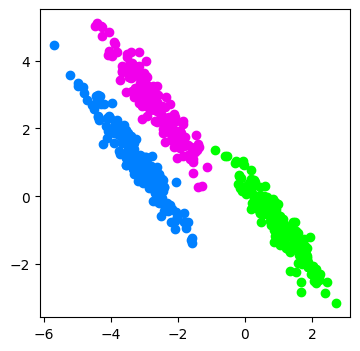

In [ ]:
df_aniso = pd.DataFrame({'x': aniso[0][:, 0], 'y': aniso[0][:, 1]})
alg = triangulation_dbscan(df_aniso, local_std= 2.5,figsize = (4,4))
clusters_df = alg.tri_dbscan()

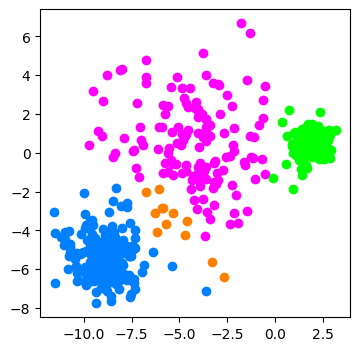

In [ ]:
df_varied = pd.DataFrame({'x': varied[0][:, 0], 'y': varied[0][:, 1]})
alg = triangulation_dbscan(df_varied, local_std= 2.5,figsize = (4,4))
clusters_df = alg.tri_dbscan()

#### Other Clustering Banchmarks

We used the Clustering basic benchmark dataset from https://cs.joensuu.fi/sipu/datasets/.

##### Aggregation Dataset

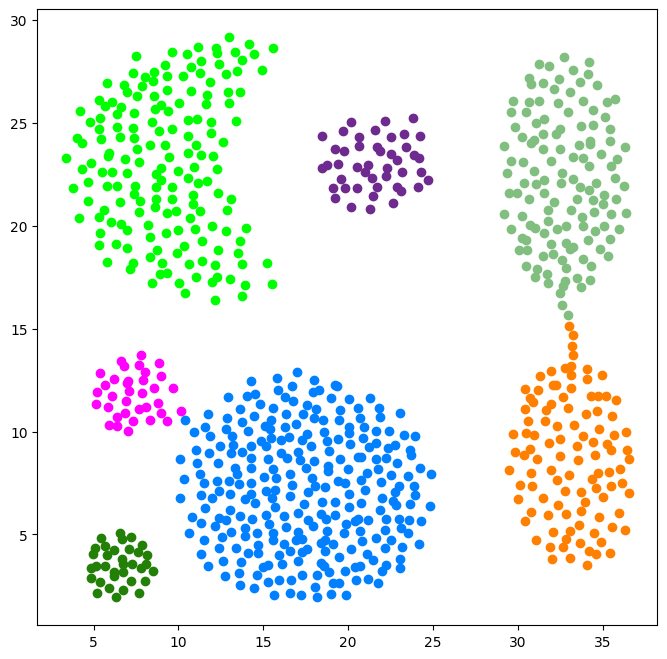

In [ ]:
df = pd.read_csv('Aggregation.txt', sep='\t', header=None, names=['x', 'y', 'cluster'])
alg = triangulation_dbscan(df[['x','y']], local_std=1.5)
clusters_df = alg.tri_dbscan()

##### Jain Dataset

Start creating initial clusters based on Kernel Density estimation:
[185, 187, 188, 195, 196, 193, 197, 192, 191, 194, 208, 206, 207, 215, 198, 199, 209, 210, 211, 212, 214, 213, 216, 217, 218, 219, 231, 220, 232, 233, 230, 229, 234, 235, 236, 227, 226, 228, 223, 224, 225, 222, 186, 178, 177, 179, 180, 181, 175, 176, 174, 200, 201, 202, 190, 189, 221, 203, 204, 205, 173, 171, 172, 182, 183, 184, 165, 164, 163, 162, 156, 155, 157, 158, 150, 161, 159, 160, 154, 152, 151, 153, 167, 166, 169, 170, 168, 149, 142, 145, 144, 143, 146, 147, 148, 141, 136, 135, 134, 133, 132, 130, 131, 129, 128, 127, 126, 122, 123, 125, 124, 120, 119, 121, 117, 116, 114, 113, 115, 118, 107, 108, 106, 105, 109, 104, 102, 110, 103, 140, 139, 138, 137, 112, 111, 101, 100, 99, 98, 97, 245, 244, 243, 253, 307, 251, 252, 242, 254, 255, 256, 258, 259, 260, 257, 248, 249, 250, 261, 262, 263, 247, 246, 264, 265, 266, 269, 270, 271, 272, 273, 282, 281, 283, 284, 280, 279, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,

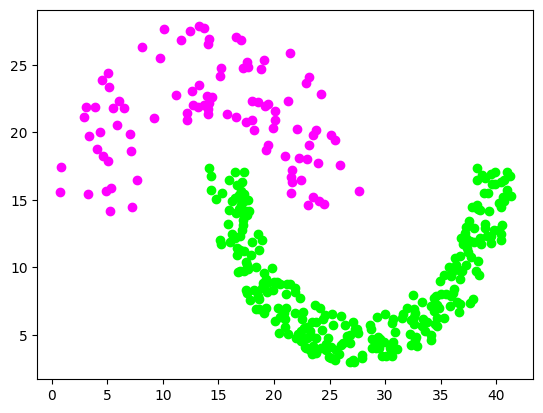

In [ ]:
df = pd.read_csv('jain.txt', sep='\t', header=None, names=['x', 'y', 'cluster'])
alg = triangulation_dbscan(df[['x','y']], minPts = 3, kde=True)
clusters_df = alg.tri_dbscan()

##### Compound Dataset

In [ ]:
df = pd.read_csv('compound.txt', sep='\t', header=None, names=['x', 'y', 'cluster'])
alg = triangulation_dbscan(df[['x','y']], kde=True, minPts = 3)
clusters_df = alg.tri_dbscan()